In [1]:
setwd("C:/dacon/re")
train<-read.table("train0722(1).csv",  sep=",", header=T)

## type_as 파생변수생성
- type_new 아파트0 아파트+상가 1
- prop_sanga 상가비율

In [9]:
table(train$type_as0);
table(train$type_as1)


   0    1 
 562 2363 


   0    1 
2363  562 

In [8]:
table(train$type_as)


   0    1 
2363  562 

In [12]:
write.csv(train, "train0722(3).csv", row.names=F)

In [21]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [23]:
head(train,5)

code,tot_pop,type_as,region,type_im,area,area_pop,num_empty,type_qual,fee_deposit,fee_rent,sub,bus,num_park,target,type_as0,type_as1,type_as2
C2483,900,0,4,6,39.72,134,38,1,15667000,103680,0,3,1425,1015,1,0,2
C2483,900,0,4,6,39.72,15,38,1,15667000,103680,0,3,1425,1015,1,0,2
C2483,900,0,4,6,51.93,385,38,1,27304000,184330,0,3,1425,1015,1,0,2
C2483,900,0,4,6,51.93,15,38,1,27304000,184330,0,3,1425,1015,1,0,2
C2483,900,0,4,6,51.93,41,38,1,27304000,184330,0,3,1425,1015,1,0,2


In [42]:
train2<-train %>% group_by(code) %>%summarise(mean=mean(type_as) )
head(train2,5)

code,mean
C1000,0.0000000
C1004,0.8947368
C1005,0.0000000
C1013,0.0000000
C1014,0.0000000


In [46]:
train[train$code=="C1004",]

,code,tot_pop,type_as,region,type_im,area,area_pop,num_empty,type_qual,fee_deposit,fee_rent,sub,bus,num_park,target,mean,type_new
765,C1004,521,0,15,7,39.30,240,3,3,4682000,104180,0,2,153,93,0.8947368,1
766,C1004,521,0,15,7,39.69,264,3,3,4728000,105210,1,2,153,93,0.8947368,1
767,C1004,521,1,15,8,19.00,1,3,4,21505000,58460,0,2,153,93,0.8947368,1
768,C1004,521,1,15,8,14.10,1,3,4,34082000,145160,0,2,153,93,0.8947368,1
769,C1004,521,1,15,8,19.31,1,3,4,19000000,113560,0,2,153,93,0.8947368,1
770,C1004,521,1,15,8,21.19,1,3,4,35800000,510510,0,2,153,93,0.8947368,1
771,C1004,521,1,15,8,21.19,1,3,4,22440000,164610,0,2,153,93,0.8947368,1
772,C1004,521,1,15,8,22.95,1,3,4,23520000,78670,0,2,153,93,0.8947368,1
773,C1004,521,1,15,8,23.40,1,3,4,6766000,146740,0,2,153,93,0.8947368,1
774,C1004,521,1,15,8,23.40,1,3,4,23370000,100690,0,2,153,93,0.8947368,1


In [29]:
train<-left_join(train, train2, by='code') 

In [32]:
str(train)

'data.frame':	2925 obs. of  16 variables:
 $ code       : Factor w/ 418 levels "C1000","C1004",..: 353 353 353 353 353 353 353 353 367 367 ...
 $ tot_pop    : int  900 900 900 900 900 900 900 900 545 545 ...
 $ type_as    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ region     : int  4 4 4 4 4 4 4 4 3 3 ...
 $ type_im    : int  6 6 6 6 6 6 6 6 6 6 ...
 $ area       : num  39.7 39.7 51.9 51.9 51.9 ...
 $ area_pop   : int  134 15 385 15 41 89 135 86 276 60 ...
 $ num_empty  : int  38 38 38 38 38 38 38 38 17 17 ...
 $ type_qual  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ fee_deposit: num  15667000 15667000 27304000 27304000 27304000 ...
 $ fee_rent   : num  103680 103680 184330 184330 184330 ...
 $ sub        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus        : int  3 3 3 3 3 3 3 3 3 3 ...
 $ num_park   : int  1425 1425 1425 1425 1425 1425 1425 1425 624 624 ...
 $ target     : int  1015 1015 1015 1015 1015 1015 1015 1015 205 205 ...
 $ mean       : num  0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
train<-train[,-c(16:18)]

In [33]:
summary(train$mean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1921  0.0000  0.9375 

- 상가만 있는 코드는 없음 
- 아파트만 있는 코드는 있음

In [34]:
train$type_new<-ifelse( train$mean ==0, 0 ,1) 

In [35]:
str(train)

'data.frame':	2925 obs. of  17 variables:
 $ code       : Factor w/ 418 levels "C1000","C1004",..: 353 353 353 353 353 353 353 353 367 367 ...
 $ tot_pop    : int  900 900 900 900 900 900 900 900 545 545 ...
 $ type_as    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ region     : int  4 4 4 4 4 4 4 4 3 3 ...
 $ type_im    : int  6 6 6 6 6 6 6 6 6 6 ...
 $ area       : num  39.7 39.7 51.9 51.9 51.9 ...
 $ area_pop   : int  134 15 385 15 41 89 135 86 276 60 ...
 $ num_empty  : int  38 38 38 38 38 38 38 38 17 17 ...
 $ type_qual  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ fee_deposit: num  15667000 15667000 27304000 27304000 27304000 ...
 $ fee_rent   : num  103680 103680 184330 184330 184330 ...
 $ sub        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus        : int  3 3 3 3 3 3 3 3 3 3 ...
 $ num_park   : int  1425 1425 1425 1425 1425 1425 1425 1425 624 624 ...
 $ target     : int  1015 1015 1015 1015 1015 1015 1015 1015 205 205 ...
 $ mean       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ type_new   : num  0 0 0 0 0 0 0 0 

## type_im 파생변수 생성
- type_im 원핫인코딩후 prop_type_im 만들기


In [36]:
train<-("train0722(4).csv", row.names=F)

In [47]:
table(train$type_im)


   1    2    3    4    5    6    7    8    9   10 
   7  198   31    3    7 1749  152  562    3  213 

In [49]:
train$type_im1<-ifelse(train$type_im==1,1,0)
train$type_im2<-ifelse(train$type_im==2,1,0)
train$type_im3<-ifelse(train$type_im==3,1,0)
train$type_im4<-ifelse(train$type_im==4,1,0)
train$type_im5<-ifelse(train$type_im==5,1,0)
train$type_im6<-ifelse(train$type_im==6,1,0)
train$type_im7<-ifelse(train$type_im==7,1,0)
train$type_im8<-ifelse(train$type_im==8,1,0)
train$type_im9<-ifelse(train$type_im==9,1,0)
train$type_im10<-ifelse(train$type_im==10,1,0)

In [50]:
str(train)

'data.frame':	2925 obs. of  27 variables:
 $ code       : Factor w/ 418 levels "C1000","C1004",..: 353 353 353 353 353 353 353 353 367 367 ...
 $ tot_pop    : int  900 900 900 900 900 900 900 900 545 545 ...
 $ type_as    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ region     : int  4 4 4 4 4 4 4 4 3 3 ...
 $ type_im    : int  6 6 6 6 6 6 6 6 6 6 ...
 $ area       : num  39.7 39.7 51.9 51.9 51.9 ...
 $ area_pop   : int  134 15 385 15 41 89 135 86 276 60 ...
 $ num_empty  : int  38 38 38 38 38 38 38 38 17 17 ...
 $ type_qual  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ fee_deposit: num  15667000 15667000 27304000 27304000 27304000 ...
 $ fee_rent   : num  103680 103680 184330 184330 184330 ...
 $ sub        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus        : int  3 3 3 3 3 3 3 3 3 3 ...
 $ num_park   : int  1425 1425 1425 1425 1425 1425 1425 1425 624 624 ...
 $ target     : int  1015 1015 1015 1015 1015 1015 1015 1015 205 205 ...
 $ mean       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ type_new   : num  0 0 0 0 0 0 0 0 

In [58]:
train2<-train %>% group_by(code) %>%summarise(prop_type_im1=mean(type_im1) 
                                           , prop_type_im2=mean(type_im2)
                                           , prop_type_im3=mean(type_im3)
                                           , prop_type_im4=mean(type_im4)
                                           , prop_type_im5=mean(type_im5)
                                            , prop_type_im6=mean(type_im6)
                                              , prop_type_im7=mean(type_im7)
                                              , prop_type_im8=mean(type_im8)
                                              , prop_type_im9=mean(type_im9)
                                              , prop_type_im10=mean(type_im10)
                                              )

In [59]:
str(train2)

tibble[,11] [418 x 11] (S3: tbl_df/tbl/data.frame)
 $ code          : Factor w/ 418 levels "C1000","C1004",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ prop_type_im1 : num [1:418] 0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im2 : num [1:418] 0 0 0 0 0 0 0 0 1 0 ...
 $ prop_type_im3 : num [1:418] 0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im4 : num [1:418] 0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im5 : num [1:418] 0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im6 : num [1:418] 1 0 1 1 1 1 1 1 0 1 ...
 $ prop_type_im7 : num [1:418] 0 0.105 0 0 0 ...
 $ prop_type_im8 : num [1:418] 0 0.895 0 0 0 ...
 $ prop_type_im9 : num [1:418] 0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im10: num [1:418] 0 0 0 0 0 0 0 0 0 0 ...


In [60]:
train<-left_join(train, train2, by='code') 

In [61]:
str(train)

'data.frame':	2925 obs. of  37 variables:
 $ code          : Factor w/ 418 levels "C1000","C1004",..: 353 353 353 353 353 353 353 353 367 367 ...
 $ tot_pop       : int  900 900 900 900 900 900 900 900 545 545 ...
 $ type_as       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ region        : int  4 4 4 4 4 4 4 4 3 3 ...
 $ type_im       : int  6 6 6 6 6 6 6 6 6 6 ...
 $ area          : num  39.7 39.7 51.9 51.9 51.9 ...
 $ area_pop      : int  134 15 385 15 41 89 135 86 276 60 ...
 $ num_empty     : int  38 38 38 38 38 38 38 38 17 17 ...
 $ type_qual     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ fee_deposit   : num  15667000 15667000 27304000 27304000 27304000 ...
 $ fee_rent      : num  103680 103680 184330 184330 184330 ...
 $ sub           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus           : int  3 3 3 3 3 3 3 3 3 3 ...
 $ num_park      : int  1425 1425 1425 1425 1425 1425 1425 1425 624 624 ...
 $ target        : int  1015 1015 1015 1015 1015 1015 1015 1015 205 205 ...
 $ mean          : num  0 0 0 0 0 0 0

In [62]:
write.csv(train, "train0722(5).csv", row.names=F)
read.table()

## area  공급면적 보고 나누기
- 공공분양 공공임대 국민임대 영구임대 임대상가 장기전세 행복주택

- `공공분양` 85이하(적합)
- `공공임대`
- `국민임대` 60이하(적합)
- `영구임대` 49이하
- `임대상가`
- `장기전세` 60이하 60초과~80이하 85초과  // 50미만 85이하 85초과
- `행복주택` 14, 16,/ 21, 29 // 36,45  (51 59? )


In [75]:
##1##모집공고 참고해서 나누기
train<-read.table("train0722(7).csv", sep=',', header=T)
table(train$area)
#16형 17.4까지
#21형 18.38~ 22.97
#26형 #29형 23.13~
  
#36 형

#43 #45형 #46형

#51 59(?)
#59초과


 12.62   14.1  14.17     15     16  16.02  16.27  16.29  16.34  16.45  16.57 
     1      6      1      8      1      1      1      1      2      1      3 
 16.64  16.67  16.71  16.75  16.76  16.77   16.8  16.84  16.85  16.87  16.89 
     3      1      2      1      1      2      3      1      3      1      1 
  16.9  16.91  16.92  16.95  16.97  16.99   17.4  18.38   18.9  18.98     19 
     1      1      2      2      1      3      2      6      1      3      3 
 19.15  19.25  19.31  19.36  19.69  20.52   20.9  21.19  21.43  21.46  21.54 
     1      4      3      3      1      1     12      6      1      6      3 
 21.56  21.63  21.72  21.78  21.81  21.84  21.85  21.86  21.88   21.9  21.94 
     3      2      1      1      2      3      1      3      2      1      4 
 21.95  21.96  21.97  21.98  21.99  22.24  22.83  22.89  22.95  22.97  23.13 
     1      2      3      7      1      1      3      3      3      2      2 
 23.25  23.35   23.4  23.48  23.54  23.76   23.8  23.86  23.88 

In [76]:
##2##10분위로 나누기
quantile(train$area, probs=c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ))

10%    20%    30%    40%    50%    60%    70%    80%    90% 
26.370 31.320 36.380 36.966 39.900 46.760 46.930 51.920 59.876

In [80]:
train$area2<-train$area<100

In [84]:
quantile(train$area, probs=0.99)

99% 
84.99

-- potential outlier처리

In [86]:
train$area<-ifelse(train$area>84.99, 84.99, train$area)
table(train$area)


12.62  14.1 14.17    15    16 16.02 16.27 16.29 16.34 16.45 16.57 16.64 16.67 
    1     6     1     8     1     1     1     1     2     1     3     3     1 
16.71 16.75 16.76 16.77  16.8 16.84 16.85 16.87 16.89  16.9 16.91 16.92 16.95 
    2     1     1     2     3     1     3     1     1     1     1     2     2 
16.97 16.99  17.4 18.38  18.9 18.98    19 19.15 19.25 19.31 19.36 19.69 20.52 
    1     3     2     6     1     3     3     1     4     3     3     1     1 
 20.9 21.19 21.43 21.46 21.54 21.56 21.63 21.72 21.78 21.81 21.84 21.85 21.86 
   12     6     1     6     3     3     2     1     1     2     3     1     3 
21.88  21.9 21.94 21.95 21.96 21.97 21.98 21.99 22.24 22.83 22.89 22.95 22.97 
    2     1     4     1     2     3     7     1     1     3     3     3     2 
23.13 23.25 23.35  23.4 23.48 23.54 23.76  23.8 23.86 23.88 23.89 23.91 23.92 
    2     2     4    30     1     2     2     1     1     2     1     2     2 
23.93 24.38 24.43 24.71 24.72 24.74 24.75 24.76 24.

In [88]:
quantile(train$area, probs=c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ))  #같음

10%    20%    30%    40%    50%    60%    70%    80%    90% 
26.370 31.320 36.380 36.966 39.900 46.760 46.930 51.920 59.876

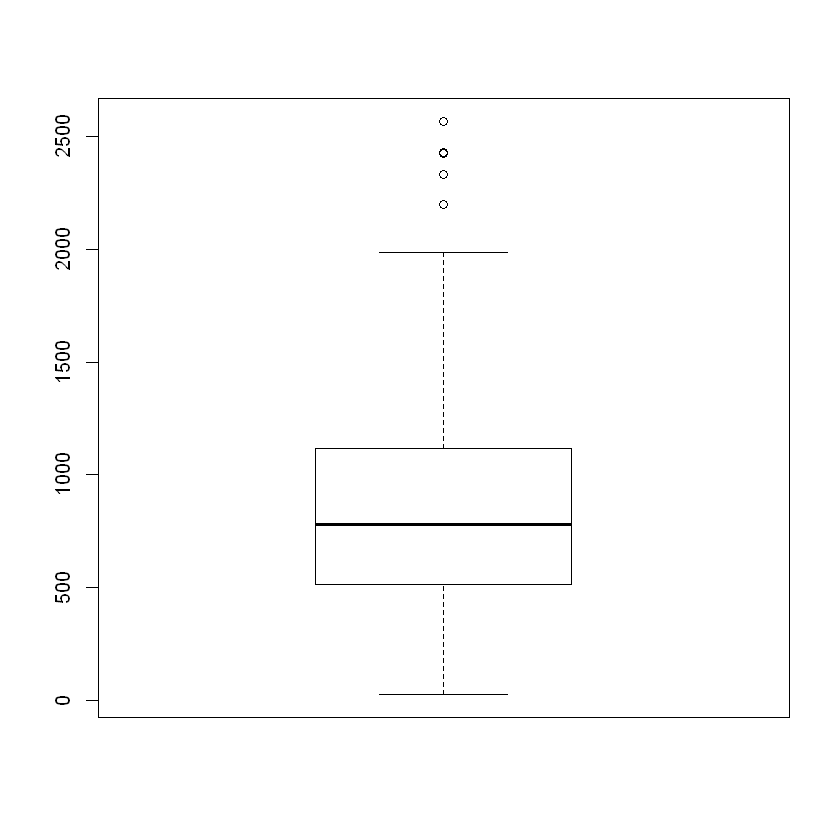

In [85]:
boxplot(train$tot_pop)

## area_pop,area_pop  :area그룹별로 더해서 tot_pop과 cor비교 

## type_qual 원핫후 prop_type_qual 만들기 

In [69]:
train<-read.table( "train0722(5).csv", sep=',', header=T)

In [70]:
table(train$type_qual)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14 
1774   21   95  569   37    3    9  155   49  114   33   33    3   30 

In [71]:
train$type_qual1<-ifelse(train$type_qual==1,1,0)
train$type_qual2<-ifelse(train$type_qual==2,1,0)
train$type_qual3<-ifelse(train$type_qual==3,1,0)
train$type_qual4<-ifelse(train$type_qual==4,1,0)
train$type_qual5<-ifelse(train$type_qual==5,1,0)
train$type_qual6<-ifelse(train$type_qual==6,1,0)
train$type_qual7<-ifelse(train$type_qual==7,1,0)
train$type_qual8<-ifelse(train$type_qual==8,1,0)
train$type_qual9<-ifelse(train$type_qual==9,1,0)
train$type_qual10<-ifelse(train$type_qual==10,1,0)
train$type_qual11<-ifelse(train$type_qual==11,1,0)
train$type_qual12<-ifelse(train$type_qual==12,1,0)
train$type_qual13<-ifelse(train$type_qual==13,1,0)
train$type_qual14<-ifelse(train$type_qual==14,1,0)

In [72]:
train2<-train %>% group_by(code) %>%summarise(prop_type_qual1=mean(type_qual1) 
                                           , prop_type_qual2=mean(type_qual2)
                                           , prop_type_qual3=mean(type_qual3)
                                           , prop_type_qual4=mean(type_qual4)
                                           , prop_type_qual5=mean(type_qual5)
                                            , prop_type_qual6=mean(type_qual6)
                                              , prop_type_qual7=mean(type_qual7)
                                              , prop_type_qual8=mean(type_qual8)
                                              , prop_type_qual9=mean(type_qual9)
                                              , prop_type_qual10=mean(type_qual10)
                                              , prop_type_qual11=mean(type_qual11)
                                              , prop_type_qual12=mean(type_qual12)
                                              , prop_type_qual13=mean(type_qual13)
                                              , prop_type_qual14=mean(type_qual14)
                                              )

In [73]:
train<-left_join(train, train2, by='code') 

In [74]:
write.csv(train, "train0722(7).csv", row.names=F)

## fee 관련 두개 area기준으로 median